Initialized centroids: [[ 7  2]
 [11  4]]


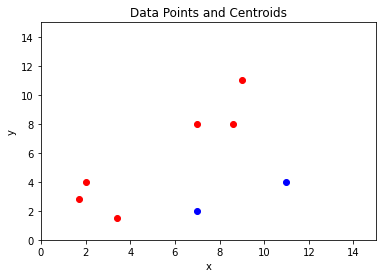

Iteration: 0, Centroids: [[2.36666667 2.76666667]
 [8.2        9.        ]]


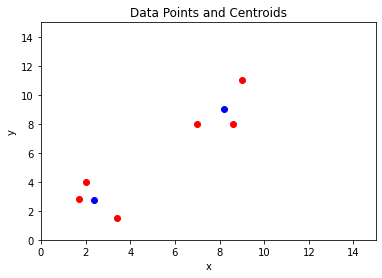

Iteration: 1, Centroids: [[2.36666667 2.76666667]
 [8.2        9.        ]]


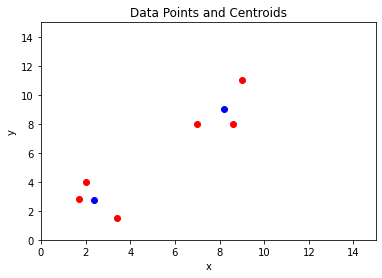

Iteration: 2, Centroids: [[2.36666667 2.76666667]
 [8.2        9.        ]]


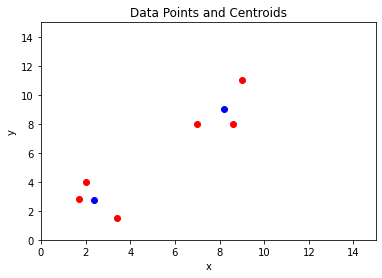

Iteration: 3, Centroids: [[2.36666667 2.76666667]
 [8.2        9.        ]]


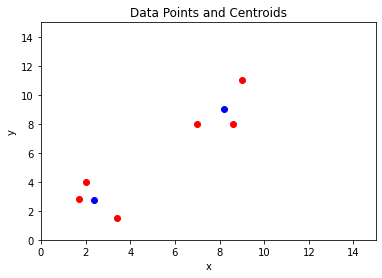

Iteration: 4, Centroids: [[2.36666667 2.76666667]
 [8.2        9.        ]]


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random 
from matplotlib import style


def euclidean_distance(a, b):
    # Euclidean distance (l2 norm)
    # 2-d scenario: We calculate the distance by summing the square of difference of x and y 
    # co-ordinates between the points and then taking the square root of this sum value.  
    distance = math.sqrt(math.pow((a[0] - b[0]),2) + pow((a[1] - b[1]),2))
    return distance

# Step 1
def closestCentroid(x, centroids):
    assignments = []
    for i in x:
        # distance between one data point and centroids
        distance=[]
        for j in centroids:
            distance.append(euclidean_distance(i, j))
            # assign each data point to the cluster with closest centroid
        assignments.append(np.argmin(distance))
    return np.array(assignments)


# Step 2
def updateCentroid(x, clusters, K):
    new_centroids = []
    for c in range(K):
        # Update the cluster centroid with the average of all points in this cluster
        # calculating the mean for x and y co-ordinates 
        cluster_mean_x = x[:,0][clusters == c].mean()
        cluster_mean_y = x[:,1][clusters == c].mean()
        
        #append the new calculated centroid coordinates 
        new_centroids.append([cluster_mean_x,cluster_mean_y])

        # return the new centroids as array
    return np.array(new_centroids)
    


# 2-d kmeans
def kmeans(x, K):
    # initialize the centroids of 2 clusters
    centroids = initCentroid(K)

    print('Initialized centroids: {}'.format(centroids))
 
    for i in range(5):
        clusters = closestCentroid(x, centroids)
        plotPoints(x,centroids)
        centroids = updateCentroid(x, clusters, K)
        print('Iteration: {}, Centroids: {}'.format(i, centroids))
        
# Random Initialize the centroids of 2 clusters. X-axis in range (0,10) and Y-Axis in range (0,12)
def initCentroid(K):
    xCordinates = []
    yCordinates = []
    for _ in range(K):
        xCordinates.append(random.randint(0, 10))
        yCordinates.append(random.randint(0, 12))
    centroid = np.array([xCordinates,yCordinates])
    return centroid


# Plot the centroid and the data points
def plotPoints(X,Y):
    # define the min and max of the plot 
    plt.axis([0,15,0,15])    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Data Points and Centroids')
    plt.plot(X[:,0], X[:,1], 'ro')
    plt.plot(Y[:,0], Y[:,1], 'bo')
    plt.show()

K = 2
Input = np.array([[2, 4],
[1.7, 2.8],
[7, 8],
[8.6, 8],
[3.4, 1.5],
[9,11]])

kmeans(Input, K)